In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [2]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
len(df)

19793

In [3]:
df = df[df['NewDateTime']>= '2021-01-01'].copy()
len(df)

8531

In [4]:
df.drop(df.head(len(df)%168).index,inplace=True)
len(df)

8400

In [5]:
int(len(df)/8*7)

7350

In [6]:
data_training = df.iloc[0:int(len(df)-168),:]
data_test = df.iloc[int(len(df)-168):int(len(df)),:]

len(data_training)

8232

In [7]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data.tail()

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
19620,48674.90,47830.00,49259.98,47212.00,10878.12140,1.017665,0.017511,1.000075,0.01,47
19621,49211.84,48674.90,49500.00,48527.01,4690.61661,1.011031,0.010971,1.000075,0.01,47
19622,49168.89,49211.83,49358.75,48865.94,2276.03432,0.999127,-0.000873,1.000075,0.01,45
19623,48747.30,49168.89,49235.38,48653.00,1159.59720,0.991426,-0.008611,1.000075,0.01,41
19624,48864.98,48747.31,48974.09,48700.19,1285.21724,1.002414,0.002411,1.000075,0.01,39


In [8]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.14417015, 0.13144365, 0.13979961, ..., 0.8892874 , 0.64028352,
        0.28235294],
       [0.14445801, 0.14416496, 0.13694925, ..., 0.8892874 , 0.64028352,
        0.29411765],
       [0.13481534, 0.14445255, 0.13598216, ..., 0.8892874 , 0.64028352,
        0.28235294],
       ...,
       [0.50590308, 0.50697454, 0.50013577, ..., 0.4289545 , 0.29444773,
        0.35294118],
       [0.49520138, 0.50588459, 0.49699604, ..., 0.4289545 , 0.29444773,
        0.30588235],
       [0.49818859, 0.49518354, 0.49034629, ..., 0.4289545 , 0.29444773,
        0.28235294]])

In [9]:
X_train = []
Y_train = []

In [10]:
training_data.shape

(8232, 10)

In [11]:
for i in range(840, training_data.shape[0],24):
    
    X_train.append(training_data[i-840:i-168])
    Y_train.append(training_data[i-168:i,0])

In [12]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [13]:
X_train.shape

(308, 672, 10)

In [14]:
Y_train.shape

(308, 168)

In [15]:
Y_train.shape[0]

308

In [16]:
Y_train=Y_train.reshape(Y_train.shape[0],168,1)

In [17]:
# Y_train[1,:,0]

In [18]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [31]:

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(X_train.shape[1], 10)))
model.add(Dropout(0.2))
model.add(RepeatVector(168))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(50, activation='relu')))
model.add(TimeDistributed(Dense(1)))

# model.add(LSTM(units = 200, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
# model.add(Dropout(0.1))
# model.add(LSTM(units = 200, return_sequences = True, activation = 'relu'))

# model.add(Dropout(0.1))
# model.add(Dense(units =1))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 200)               168800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 168, 200)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 168, 200)          320800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 168, 200)          0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 168, 50)           10050     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 168, 1)           

In [34]:
model.compile(loss='mse', optimizer='adam')

In [35]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=32, verbose=1, validation_split=0.1)

Train on 277 samples, validate on 31 samples
Epoch 1/15
277/277 [==============================] - 97s 349ms/sample - loss: 0.1204 - val_loss: 0.0338
Epoch 2/15
277/277 [==============================] - 93s 337ms/sample - loss: 0.0292 - val_loss: 0.0137
Epoch 3/15
277/277 [==============================] - 94s 338ms/sample - loss: 0.0165 - val_loss: 0.0122
Epoch 4/15
277/277 [==============================] - 92s 334ms/sample - loss: 0.0146 - val_loss: 0.0109
Epoch 5/15
277/277 [==============================] - 94s 340ms/sample - loss: 0.0122 - val_loss: 0.0114
Epoch 6/15
277/277 [==============================] - 92s 332ms/sample - loss: 0.0124 - val_loss: 0.0102
Epoch 7/15
277/277 [==============================] - 93s 335ms/sample - loss: 0.0117 - val_loss: 0.0088
Epoch 8/15
277/277 [==============================] - 92s 334ms/sample - loss: 0.0107 - val_loss: 0.0083
Epoch 9/15
277/277 [==============================] - 94s 338ms/sample - loss: 0.0099 - val_loss: 0.0087
Epoch 10/1

In [36]:
# import tensorflow as tf
# model = tf.keras.models.load_model('LSTM_168_1216.h5')

In [37]:
model.save("840_168.h5")

In [38]:
# result = model.predict(X_train, batch_size=128, verbose=0)
# for value in result[0,:,0]:
# 	print('%.1f' % value)

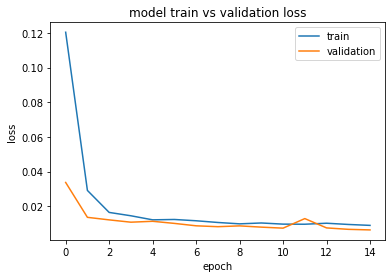

In [39]:
loss = history.history['loss']
epoch = range(len(loss))
# plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [40]:
history.history

{'loss': [0.12037701869134654,
  0.02916545493508074,
  0.016486267959329195,
  0.014553126317553141,
  0.01221181297614256,
  0.0124203864458128,
  0.011672597358319303,
  0.010689695355640422,
  0.009899072954263068,
  0.010394830636626332,
  0.009733025230036961,
  0.009678079107850252,
  0.010256698334905645,
  0.009545405808876568,
  0.009012314097599432],
 'val_loss': [0.03376215696334839,
  0.013652482070028782,
  0.012185672298073769,
  0.010853094980120659,
  0.01136960182338953,
  0.01015838235616684,
  0.008767307735979557,
  0.008260183967649937,
  0.00872524082660675,
  0.00800135638564825,
  0.007416065316647291,
  0.012928832322359085,
  0.0075569176115095615,
  0.006737766787409782,
  0.0063979108817875385]}

In [41]:
# from tensorflow import keras
# regressor = Sequential()
# regressor = keras.models.load_model("LSTM_model_1210.h5")

In [42]:
past_4weeks = data_training.tail(672)
df= past_4weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
df = df.drop(['NewDateTime'], axis = 1)
len(df)

840

In [43]:
inputs = scaler.transform(df)
inputs

array([[0.79328894, 0.78956659, 0.78979706, ..., 0.41218561, 0.29444773,
        0.89411765],
       [0.79530368, 0.7932601 , 0.79579148, ..., 0.41218561, 0.29444773,
        0.89411765],
       [0.79747859, 0.79527451, 0.79137799, ..., 0.41218561, 0.29444773,
        0.89411765],
       ...,
       [0.50285571, 0.50094603, 0.49456789, ..., 0.44047072, 0.29444773,
        0.37647059],
       [0.50103745, 0.50283708, 0.49315492, ..., 0.44047072, 0.29444773,
        0.36470588],
       [0.49116176, 0.50101914, 0.49090109, ..., 0.44047072, 0.29444773,
        0.4       ]])

In [46]:
X_test = []
Y_test = []
for i in range(840, inputs.shape[0]+1,24):
    X_test.append(inputs[i-840:i-168])
    Y_test.append(inputs[i-168:i,0])

In [47]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((1, 672, 10), (1, 168))

In [42]:
Y_test=Y_test.reshape(1,168,1)

In [43]:
X_pred = model.predict(X_train)
X_pred.shape

(259, 168, 1)

In [48]:
Y_pred = model.predict(X_test)
Y_pred, Y_test

(array([[[0.25748634],
         [0.35756218],
         [0.41996953],
         [0.45590362],
         [0.47519153],
         [0.48399562],
         [0.4866209 ],
         [0.485874  ],
         [0.48346668],
         [0.48047686],
         [0.477647  ],
         [0.47547323],
         [0.47355905],
         [0.4719466 ],
         [0.47063336],
         [0.46958858],
         [0.46877283],
         [0.4681455 ],
         [0.46766964],
         [0.46731275],
         [0.46704787],
         [0.46685323],
         [0.46671143],
         [0.4666091 ],
         [0.46653575],
         [0.46648368],
         [0.46644703],
         [0.46642134],
         [0.4664036 ],
         [0.46639144],
         [0.4663831 ],
         [0.4663775 ],
         [0.4663738 ],
         [0.46637136],
         [0.46636975],
         [0.4663688 ],
         [0.4663681 ],
         [0.4663677 ],
         [0.46636745],
         [0.46636736],
         [0.46636733],
         [0.46636724],
         [0.46636724],
         [0

In [49]:
Y_pred.shape

(1, 168, 1)

In [50]:
scaler.scale_

array([2.53841253e-05, 2.53832103e-05, 2.54497156e-05, 2.52231047e-05,
       2.26040745e-05, 4.70137657e+00, 4.76290973e+00, 1.02247277e+01,
       2.95333727e+00, 1.17647059e-02])

In [52]:
scale = 1/2.53841253e-05
scale

39394.699962342216

In [53]:
# scale.inverse_transform(Y_pred)

In [54]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [55]:
Y_pred.shape

(1, 168, 1)

In [63]:
Y_test[0,0]

19813.459981060114

In [57]:
len(Y_pred[1,:,0])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [60]:
Y_pred

array([[[10143.597],
        [14086.055],
        [16544.574],
        [17960.186],
        [18720.027],
        [19066.861],
        [19170.283],
        [19140.86 ],
        [19046.025],
        [18928.242],
        [18816.76 ],
        [18731.125],
        [18655.717],
        [18592.193],
        [18540.459],
        [18499.3  ],
        [18467.164],
        [18442.451],
        [18423.705],
        [18409.645],
        [18399.21 ],
        [18391.543],
        [18385.957],
        [18381.924],
        [18379.035],
        [18376.984],
        [18375.541],
        [18374.527],
        [18373.83 ],
        [18373.352],
        [18373.021],
        [18372.8  ],
        [18372.656],
        [18372.559],
        [18372.496],
        [18372.459],
        [18372.432],
        [18372.414],
        [18372.406],
        [18372.402],
        [18372.4  ],
        [18372.396],
        [18372.396],
        [18372.396],
        [18372.396],
        [18372.396],
        [18372.396],
        [1837

ValueError: x and y can be no greater than 2-D, but have shapes (1,) and (1, 168, 1)

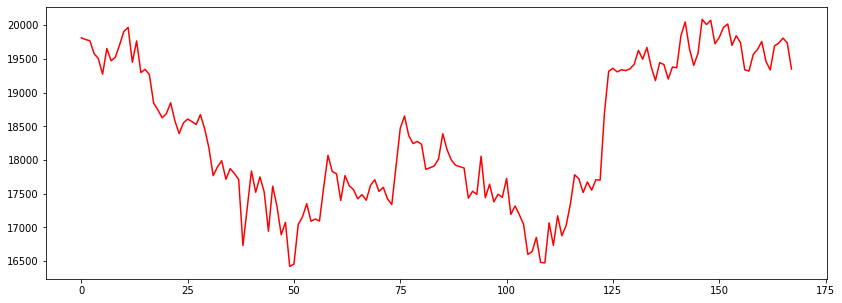

In [64]:
plt.figure(figsize=(14,5))
plt.plot(Y_test[0,:], color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()